In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("customer.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5187,2080-CAZNM,Female,1,No,No,41,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.40,4133.95,No
6818,2710-WYVXG,Female,0,No,No,3,Yes,No,DSL,Yes,...,No,Yes,No,Yes,Two year,No,Mailed check,71.10,213.35,No
4366,0537-QYZZN,Male,1,Yes,Yes,24,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,79.85,1857.75,No
1108,9397-TZSHA,Female,0,No,No,69,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.60,1678.05,No
1104,8717-VCTXJ,Male,0,No,No,42,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.55,839.4,No


In [3]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [4]:
df.drop('customerID',axis='columns',inplace=True)

In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [8]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
# Remove rows with space in TotalCharges
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [10]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\User\AppData\Local\Temp\ipykernel_10652\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [11]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [12]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


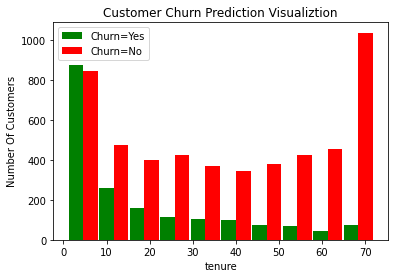

In [13]:
# Data Visualization
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

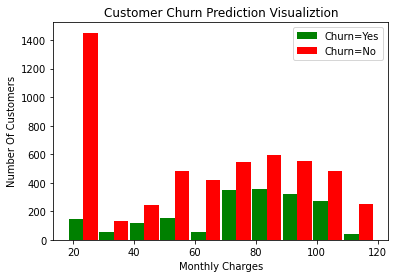

In [14]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [15]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [16]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [17]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


C:\Users\User\AppData\Local\Temp\ipykernel_10652\1172639594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_10652\1172639594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [18]:
# Convert Yes and No to 1 or 0
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_10652\1661631988.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [19]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [20]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)
df1.gender.unique()

C:\Users\User\AppData\Local\Temp\ipykernel_10652\2321097074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


array([1, 0], dtype=int64)

In [21]:
# One hot encoding for categorical columns
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [22]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [23]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [24]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [25]:
X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [26]:
y_train.value_counts()

0.0    4130
1.0    1495
Name: Churn, dtype: int64

In [27]:
y_test.value_counts()

0.0    1033
1.0     374
Name: Churn, dtype: int64

In [28]:
# Build a model (ANN) 
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [29]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [30]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.5792 - accuracy: 0.7032
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4324 - accuracy: 0.7896
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4177 - accuracy: 0.8039
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4134 - accuracy: 0.8066
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4171 - accuracy: 0.8059
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4246 - accuracy: 0.7964
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4196 - accuracy: 0.7960
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4031 - accuracy: 0.8111
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4123 - accuracy: 0.8039
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4145 - accura

176/176 [==============================] - 0s 1ms/step - loss: 0.3567 - accuracy: 0.8377
Epoch 81/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3579 - accuracy: 0.8246
Epoch 82/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3578 - accuracy: 0.8287
Epoch 83/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3543 - accuracy: 0.8369
Epoch 84/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3660 - accuracy: 0.8339
Epoch 85/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3478 - accuracy: 0.8387
Epoch 86/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3566 - accuracy: 0.8308
Epoch 87/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3451 - accuracy: 0.8330
Epoch 88/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3420 - accuracy: 0.8390
Epoch 89/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3627 - accuracy: 

## Mitigating Skewdness of Data

In [31]:
# Undersampling
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [32]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [33]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [34]:
# Number of classes in training Data
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [35]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6865 - accuracy: 0.5647
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5342 - accuracy: 0.7510
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4817 - accuracy: 0.7673
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4881 - accuracy: 0.7583
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4786 - accuracy: 0.7728
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4802 - accuracy: 0.7649
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4812 - accuracy: 0.7708
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4661 - accuracy: 0.7706
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4535 - accuracy: 0.7790
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4882 - accuracy: 0.7562
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.3823 - accuracy: 0.8297
Epoch 84/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3677 - accuracy: 0.8312
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3770 - accuracy: 0.8300
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3752 - accuracy: 0.8273
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3674 - accuracy: 0.8308
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3772 - accuracy: 0.8259
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3899 - accuracy: 0.8213
Epoch 90/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3806 - accuracy: 0.8271
Epoch 91/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3610 - accuracy: 0.8405
Epoch 92/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3664 - accuracy: 0.8339
Epoch 93/100


In [36]:
# Oversampling
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [37]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [38]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [39]:
loss = keras.losses.BinaryCrossentropy()
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.6048 - accuracy: 0.6736
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4842 - accuracy: 0.7622
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4895 - accuracy: 0.7579
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4731 - accuracy: 0.7719
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4784 - accuracy: 0.7698
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4696 - accuracy: 0.7687
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4676 - accuracy: 0.7758
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.7715
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4650 - accuracy: 0.7792
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4635 - accura

Epoch 81/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3714 - accuracy: 0.8360
Epoch 82/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3597 - accuracy: 0.8405
Epoch 83/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3808 - accuracy: 0.8307
Epoch 84/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3756 - accuracy: 0.8377
Epoch 85/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3712 - accuracy: 0.8381
Epoch 86/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3787 - accuracy: 0.8374
Epoch 87/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3725 - accuracy: 0.8340
Epoch 88/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3708 - accuracy: 0.8371
Epoch 89/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3794 - accuracy: 0.8348
Epoch 90/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3603

In [42]:
# SMOTE

X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [44]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [45]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.6133 - accuracy: 0.6658
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4765 - accuracy: 0.7716
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4556 - accuracy: 0.7831
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4674 - accuracy: 0.7763
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4531 - accuracy: 0.7829
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4423 - accuracy: 0.7929
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4356 - accuracy: 0.7972
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4423 - accuracy: 0.7935
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4315 - accuracy: 0.8004
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4353 - accura

259/259 [==============================] - 0s 2ms/step - loss: 0.3394 - accuracy: 0.8543
Epoch 81/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3525 - accuracy: 0.8454
Epoch 82/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3446 - accuracy: 0.8513
Epoch 83/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3444 - accuracy: 0.8462
Epoch 84/100
259/259 [==============================] - 1s 2ms/step - loss: 0.3463 - accuracy: 0.8443
Epoch 85/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3494 - accuracy: 0.8478
Epoch 86/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3350 - accuracy: 0.8558
Epoch 87/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3437 - accuracy: 0.8557
Epoch 88/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3436 - accuracy: 0.8540
Epoch 89/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3403 - accuracy: 

In [46]:
# Ensemble with undersampling

# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [48]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [49]:
df3 = X_train.copy()
df3['Churn'] = y_train
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [50]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [51]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train  

In [52]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6356 - accuracy: 0.6335
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5235 - accuracy: 0.7588
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4993 - accuracy: 0.7608
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4900 - accuracy: 0.7668
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4720 - accuracy: 0.7762
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4908 - accuracy: 0.7668
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4959 - accuracy: 0.7553
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4696 - accuracy: 0.7837
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4545 - accuracy: 0.7877
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4756 - accuracy: 0.7633
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8286
Epoch 83/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3995 - accuracy: 0.8205
Epoch 84/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3571 - accuracy: 0.8375
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3900 - accuracy: 0.8212
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3973 - accuracy: 0.8149
Epoch 87/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3955 - accuracy: 0.8258
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3794 - accuracy: 0.8306
Epoch 89/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3901 - accuracy: 0.8134
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3845 - accuracy: 0.8272
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3751 - accuracy: 0.8307
Epoch 92/100


In [53]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.7005 - accuracy: 0.5306
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5341 - accuracy: 0.7518
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4993 - accuracy: 0.7580
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4857 - accuracy: 0.7619
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4924 - accuracy: 0.7611
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4791 - accuracy: 0.7709
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4756 - accuracy: 0.7681
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4758 - accuracy: 0.7712
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4758 - accuracy: 0.7626
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4646 - accuracy: 0.7789
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.3721 - accuracy: 0.8245
Epoch 83/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3984 - accuracy: 0.8082
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3826 - accuracy: 0.8172
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3745 - accuracy: 0.8329
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3748 - accuracy: 0.8219
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3799 - accuracy: 0.8266
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3913 - accuracy: 0.8074
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3864 - accuracy: 0.8213
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3742 - accuracy: 0.8306
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3687 - accuracy: 0.8211
Epoch 92/100


In [54]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 2ms/step - loss: 0.6538 - accuracy: 0.6240
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5163 - accuracy: 0.7431
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4937 - accuracy: 0.7649
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4865 - accuracy: 0.7627
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4857 - accuracy: 0.7572
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4874 - accuracy: 0.7573
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4707 - accuracy: 0.7711
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4652 - accuracy: 0.7906
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4581 - accuracy: 0.7825
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4463 - accuracy: 0.7985
Epoch 11/

83/83 [==============================] - 0s 2ms/step - loss: 0.3966 - accuracy: 0.8196
Epoch 83/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3847 - accuracy: 0.8305
Epoch 84/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3605 - accuracy: 0.8469
Epoch 85/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3667 - accuracy: 0.8426
Epoch 86/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3753 - accuracy: 0.8321
Epoch 87/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3620 - accuracy: 0.8296
Epoch 88/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3718 - accuracy: 0.8367
Epoch 89/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3651 - accuracy: 0.8400
Epoch 90/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3690 - accuracy: 0.8335
Epoch 91/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3646 - accuracy: 0.8325
Epoch 92/100


In [55]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [56]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.68      0.78      1033
           1       0.47      0.78      0.59       374

    accuracy                           0.71      1407
   macro avg       0.68      0.73      0.68      1407
weighted avg       0.78      0.71      0.73      1407

